### Задача 1


По датафрейму построим график и статистику рейтингов

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("CommitmentBank-items.csv")
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,uID,Verb,Embedding,Context,Target,Prompt,ModalType,MatTense,MatSubjLemma,MatSubjPer,MatSubjNum,Embedding.1,genre,factive,mean.noTarget,sd.noTarget,Mean,SD,Reponses
0,1,BNC-1,admit,conditional,Polly had to think quickly.,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,NaN,future,she,third,singular,conditional,BNC,no,-0.111111,1.269296,2.000000,0.866025,"2, 3, 3, 1, 3, 1, 2, 1, 2"
1,2,BNC-1002,say,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,CI,present,it,third,singular,modal,BNC,no,1.200000,1.873796,1.875000,0.834523,"2, 1, 3, 1, 2, 2, 3, 1"
2,3,BNC-1003,say,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,AB,present,he,third,singular,modal,BNC,no,-0.250000,0.462910,0.666667,1.154701,"2, 0, 1, 0, 0, 3, -1, 0, 1, 0, 0, 2"
3,4,BNC-1005,say,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...,it was for the children,AB,future,she,third,singular,modal,BNC,no,0.636364,1.120065,0.875000,0.991031,"2, 1, 0, 1, -1, 1, 1, 2"
4,5,BNC-1006,say,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...,it was all right,AB,future,she,third,singular,modal,BNC,no,-1.090909,1.044466,0.000000,2.309401,"3, 1, -2, -3, -3, 3, 2, 1, -1, -1"


In [58]:
df.groupby(by='Verb').agg({'Mean': ['mean', 'std']}).sort_values(by=('Mean', 'mean'), ascending=False)

Mean          
                 mean       std
Verb                           
forget       2.439530  0.673231
learn        2.303241  0.674000
notice       2.138295  0.500467
swear        2.100000       NaN
tell         1.900731  1.005332
understand   1.797840  0.777104
accept       1.701389  0.108030
remember     1.660714  1.834523
recognize    1.625000       NaN
see          1.501557  1.670160
bother       1.500000       NaN
admit        1.266204  1.093133
show         1.233333  0.612826
guess        1.133611  1.121625
realize      1.100313  1.060508
announce     0.981481  0.305976
hear         0.976515  1.117153
bet          0.900000       NaN
know         0.866498  1.423045
find         0.822054  1.024801
foresee      0.777778       NaN
suspect      0.777083  0.825849
specify      0.666667       NaN
take         0.625000       NaN
prove        0.558824  0.499327
decide       0.517172  0.652580
assume       0.492186  1.051081
fear         0.445833  0.283425
signal       0.400000  0.565685
say          0.352734  1.543559
hypothesize  0.000000       NaN
convince    -0.110644  1.206520
believe     -0.111652  1.589238
figure      -0.125000       NaN
hope        -0.146389  0.725250
mean        -0.248353  1.265216
insist      -0.272222  1.160641
imagine     -0.316667  1.173956
feel        -0.374766  1.525272
demand      -0.583333  1.060660
expect      -0.588235  1.606046
suppose     -0.630208  1.218834
suggest     -0.738450  0.901630
think       -1.002429  1.117654
guarantee   -1.005556  0.149278
seem        -1.292929  0.099995
pretend     -1.483796  0.934978
occur       -1.500000       NaN

Самой высокой проективностью обладает глагол 'forget', 'learn', 'notice', самыми низкими - 'occur', 'pretend', 'seem'. Это соответствует их семантике.

In [59]:
df.groupby(by='Embedding.1').agg({'Mean': ['mean', 'std']}).sort_values(by=('Mean', 'mean'), ascending=False)

Mean          
                 mean       std
Embedding.1                    
modal        1.108415  1.245025
conditional  0.570070  1.306486
question     0.451632  1.276591
negation    -0.643293  1.493929

По датасету в среднем видим, что наиболее проективными контекстами оказываются модальные, самыми непроективными - контексты отрицания.
 - Модальный > Условный > Вопросительный > Отрицания

Гипотеза будто бы не подтверждается, ведь по гипотезе
- Условный > Вопросительный > Отрицания, Модальный



In [6]:
df2 = df.groupby(by=['Verb', 'Embedding.1']).agg({'Mean': 'mean'})
df2 = df2.sort_values(by='Mean')

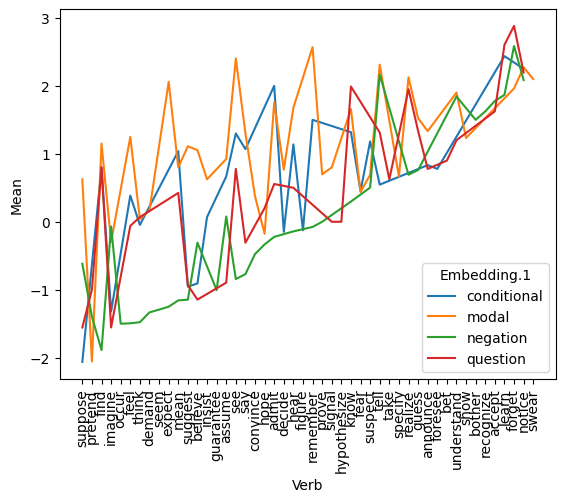

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="Verb", y="Mean",
             hue="Embedding.1",
             data=df2)
plt.xticks(rotation=90)
plt.show()

На графике видим  похожее, но также видим и то, что модальный контекст ведёт себя достаточно скачкообразно, возможно, это зависит от конкретного модального оператора.

Также такие результаты могли быть получены за счёт того, что датасет не сбалансирован относительно предикатов и контекстов.

In [61]:
df['Embedding.1'].value_counts()

negation       605
modal          311
question       167
conditional    117
Name: Embedding.1, dtype: int64


### Задача 2

По той же диагностике certain, that, что и в статье, я провела опрос коллег из 518 для трёх отобранных из НКРЯ примеров:

1. — Вот видите, — развел руками Леонид Васильевич, — у меня этой служебной записки нет. Но, откровенно говоря, она мне не очень и нужна. И я не скажу, что это сверхнужная и сверхважная бумага.
2.  Она молчала. Я перестал понимать что бы то ни было. — Джеф! Как ты можешь знать, что у Лели в гостях была женщина, да еще знать, какого она возраста, если ты ее не видел и не слышал?
3.  Одержимость — шахматами в том числе — до добра не доводит, но зачастую открывает кратчайший путь в религиозную секту, в одной из которых Фишер состоял много лет. Гроссмейстер вечно подозревал, что все его хотят эксплуатировать.


In [8]:
import numpy as np

In [63]:
mycombank = pd.DataFrame({'Source':["НКРЯ", "НКРЯ", "НКРЯ"], 'Verb':['сказать', 'знать', 'подозревать'],	'Embedding':['отрицание', 'вопрос', 'ничего'], 'Context':["— Вот видите, — развел руками Леонид Васильевич, — у меня этой служебной записки нет. Но, откровенно говоря, она мне не очень и нужна.", "Она молчала. Я перестал понимать что бы то ни было. — Джеф!", "Одержимость — шахматами в том числе — до добра не доводит, но зачастую открывает кратчайший путь в религиозную секту, в одной из которых Фишер состоял много лет."], 'Target':["И я не скажу, что это сверхнужная и сверхважная бумага.", "— Джеф! Как ты можешь знать, что у Лели в гостях была женщина, да еще знать, какого она возраста, если ты ее не видел и не слышал?", "Гроссмейстер вечно подозревал, что все его хотят эксплуатировать."], 'Mean':[np.mean([1, -1, 1, 1, -1]), np.mean([0, 3, -2, 3, -1]), np.mean([-3, 1, -1, 0, -3])],	'Reponses':[[1, -1, 1, 1, -1], [0, 3, -2, 3, -1], [-3, 1, -1, 0, -3]]})
mycombank

,Source,Verb,Embedding,Context,Target,Mean,Reponses
0,НКРЯ,сказать,отрицание,"— Вот видите, — развел руками Леонид Васильеви...","И я не скажу, что это сверхнужная и сверхважна...",0.2,"[1, -1, 1, 1, -1]"
1,НКРЯ,знать,вопрос,Она молчала. Я перестал понимать что бы то ни ...,"— Джеф! Как ты можешь знать, что у Лели в гост...",0.6,"[0, 3, -2, 3, -1]"
2,НКРЯ,подозревать,ничего,Одержимость — шахматами в том числе — до добра...,"Гроссмейстер вечно подозревал, что все его хот...",-1.2,"[-3, 1, -1, 0, -3]"


Наибольшей уверенностью по мнению респондентов обладал говорящий из второго примера, где в вопрос затесалось модальное "можешь". Ответы респондентов варьировались друг относительно друга, и нами бы воспринималась как нейтральная, но относительно других рейтинг был самым высоким в среднем. Возможно, на коммитмент повлиял дополнительный контекст "да еще знать, какого она возраста", ведь детальное предположение Джефа скорее всего будет неспроста и "как ты можешь знать" будет скорее относиться к образу действия, а не к верности суждения.

Вторым по уверенности является первый пример, со средним 0 несмотря на отрицание. На это могли повлиять гиперболизирующие префиксы "сверх-", которые хоть и показывают иронию, всё же указывают на то, что говорящий отчасти согласен с характеристиками, к которым они добавляются (то же с "очень" в предшествующем контексте "не очень и нужна"). Также частичное согласие может проявляться через указание говорящего на то, что он говорит именно о себе, а другие могут иметь другое мнение, которое он не оспаривает.

Стимул, который оказался самым низким по рейтингу коммитмента - третий пример. Думаю, что на это повлиял предыдущий контекст, где откровенно негативно отзываются о разумности Фишера и сам предикат "подозревать".


### Задача 3

Категоризуем средний рейтинг стимулов в следствие, нейтральное отношение и противоречие

In [65]:
df3 = df
def label(row):
   if row['Mean'] <= 3 and row['Mean'] >= 1:
      return 'entailment'
   if row['Mean'] >= -3 and row['Mean'] <= -1:
      return 'contradiction'
   else:
      return 'neutral'

df3['label'] = df3.apply(label, axis=1)
df3 = df3[['Target', 'Prompt', 'label']]
df3

,Target,Prompt,label
0,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,entailment
1,Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,entailment
2,He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,neutral
3,Of course she could say it was for the childre...,it was for the children,neutral
4,Robyn swallowed and took a deep breath trying ...,it was all right,neutral
...,...,...,...
1195,Twenty percent don't even feel they are financ...,they are financially well off,contradiction
1196,This does not mean that the Federal Reserve do...,the Federal Reserve does not already play an i...,neutral
1197,"In a letter, prosecutors told Mr. Antar's lawy...",any fees collected from Mr. Antar may be seized,entailment
1198,And although Warner has said it wanted the pro...,the relationship could be repaired after the a...,contradiction


Вставим токен [SEP], как в статье, перед prompt, и [CLS] в начало.

In [66]:
 def insert_sep(row):
    main_string = row['Target']
    substring = row['Prompt']
    i = main_string.find(substring)
    if i != -1:
        return '[CLS] ' + main_string[:i] + '[SEP] ' + main_string[i:]
    else:
        return '[CLS] ' + main_string
df3['fin_prompt'] = df3.apply(insert_sep, axis=1)
df3 = df3[['fin_prompt', 'label']]
df3

<ipython-input-66-ab2323877184>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['fin_prompt'] = df3.apply(insert_sep, axis=1)


,fin_prompt,label
0,[CLS] They were still close enough to shore fo...,entailment
1,[CLS] Indeed it could be said that they had pr...,entailment
2,[CLS] He might have said to her that [SEP] som...,neutral
3,[CLS] Of course she could say [SEP] it was for...,neutral
4,[CLS] Robyn swallowed and took a deep breath t...,neutral
...,...,...
1195,[CLS] Twenty percent don't even feel [SEP] the...,contradiction
1196,[CLS] This does not mean that [SEP] the Federa...,neutral
1197,"[CLS] In a letter, prosecutors told Mr. Antar'...",entailment
1198,[CLS] And although Warner has said it wanted t...,contradiction


In [67]:
!pip install datasets
from datasets import Dataset

In [68]:
dataset = Dataset.from_pandas(df3)
dataset

Dataset({
    features: ['fin_prompt', 'label'],
    num_rows: 1200
})

In [69]:
from tqdm.notebook import tqdm

import torch
from torch.utils.data import DataLoader

from transformers import AutoTokenizer, AutoModel

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Беру предобученную NLI DeBerta с HuggingFace

In [70]:
tokenizer = AutoTokenizer.from_pretrained("cross-encoder/nli-deberta-base")

In [71]:
model = AutoModel.from_pretrained("cross-encoder/nli-deberta-base")


In [73]:
device_cuda = torch.device("cuda")

На CUDA векторизуем датасет

In [74]:
def vectorize_dataset_and_return(data):
    res = []
    for batch in tqdm(data):
        toks = tokenizer(batch['fin_prompt'], padding='max_length', truncation=True, return_tensors='pt',
          max_length=64)
        with torch.no_grad():
            model_output = model(**{k: v.to(model.device) for k, v in toks.items()})
        res.append(torch.mean(model_output.last_hidden_state, dim=1))
    res = torch.vstack(res)
    return res.detach().cpu().numpy()

In [75]:
dl = DataLoader(dataset, batch_size=256, shuffle=False,
                drop_last=False)
vecs = vectorize_dataset_and_return(dl)
vecs.shape

  0%|          | 0/5 [00:00<?, ?it/s]

(1200, 768)

Кодируем метки

In [76]:
le = LabelEncoder()
le.fit(dataset['label'])
lbl = le.transform(dataset['label'])

Разбиваем на тренировочную и тестовую выборки

In [77]:
x_train, x_test, y_train, y_test = train_test_split(vecs, lbl, test_size=0.33, random_state=42)

Классифицируем, смотрим на результат на тренировочной и тестовой выборках

In [78]:
clf = MLPClassifier(random_state=1, max_iter=300, verbose=1)
clf.fit(x_train, y_train)

Iteration 1, loss = 1.28918476
Iteration 2, loss = 1.08321811
Iteration 3, loss = 1.17815344
Iteration 4, loss = 1.12090173
Iteration 5, loss = 1.08155222
Iteration 6, loss = 1.01456892
Iteration 7, loss = 1.07844438
Iteration 8, loss = 1.05330692
Iteration 9, loss = 1.05587909
Iteration 10, loss = 1.03361247
Iteration 11, loss = 1.03104245
Iteration 12, loss = 0.99771838
Iteration 13, loss = 0.97339563
Iteration 14, loss = 0.95602978
Iteration 15, loss = 1.01268864
Iteration 16, loss = 0.99247018
Iteration 17, loss = 1.00434204
Iteration 18, loss = 0.95224130
Iteration 19, loss = 0.92173278
Iteration 20, loss = 0.91922538
Iteration 21, loss = 0.93186101
Iteration 22, loss = 0.98269085
Iteration 23, loss = 0.95912944
Iteration 24, loss = 0.92546018
Iteration 25, loss = 0.91994447
Iteration 26, loss = 0.91465184
Iteration 27, loss = 0.88862613
Iteration 28, loss = 0.90602873
Iteration 29, loss = 0.87989819
Iteration 30, loss = 0.86589951
Iteration 31, loss = 0.91010042
Iteration 32, los

MLPClassifier(max_iter=300, random_state=1, verbose=1)

In [79]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [80]:
crep = classification_report(y_train, train_pred, target_names=le.classes_)
print(crep)

               precision    recall  f1-score   support

contradiction       0.81      0.77      0.79       260
   entailment       0.91      0.31      0.46       272
      neutral       0.50      0.86      0.63       272

     accuracy                           0.64       804
    macro avg       0.74      0.64      0.63       804
 weighted avg       0.74      0.64      0.62       804



In [81]:
crep = classification_report(y_test, test_pred, target_names=le.classes_)
print(crep)

               precision    recall  f1-score   support

contradiction       0.70      0.64      0.67       126
   entailment       0.83      0.32      0.46       118
      neutral       0.50      0.76      0.60       152

     accuracy                           0.59       396
    macro avg       0.67      0.58      0.58       396
 weighted avg       0.66      0.59      0.58       396



На тренировочной и тестовой выборке видим относительно близкий к случайному f1-score, при этом либо precision (что интересно, для противоречий и следствий, крайних на логической шкале значений), либо recall (для нейтральных) получаются неплохими. На то и нужна f1. Модель выходит не очень хорошая, с точностью в 0,6.

Возможно, модели нужно больше контекста, чтобы делать выводы, ведь рейтинг коммитмента не всегда можно определить по одному предложению даже человеку.